# ACP

* Probl√©matique g√©n√©rale de l'ACP
  Comment identifier les principales dimensions expliquant la variance des donn√©es pour simplifier leur interpr√©tation, tout en conservant les informations essentielles li√©es aux relations entre les variables ?

### I. ACP Norm√©

##### 1.pr√©paration de donn√©es

In [1]:
#importation des Biblioth√®que
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load les donn√©es
df = pd.read_csv('dataset_fin.csv')
df.head()

Unnamed: 0 Reference area       GDP  TIME_PERIOD    Income  Expenditure   \
0           0      Australia  3.441992         2022  2.630387      6.318369   
1           1        Austria  5.277894         2022  0.676556      4.911191   
2           2        Belgium  4.233432         2022  0.945041      3.635884   
3           3         Canada  4.189036         2022  5.478162      5.464745   
4           4          Chile  2.058740         2022 -1.181835      1.642339   

   Components of aggregate demand  Production    Households  Government  \
0                        3.090439    3.665822  39871.843115   37.198877   
1                        2.438285    6.070283  40299.683652   53.010387   
2                        1.815193    4.515443  36499.838230   52.240785   
3                        2.960486    4.139944  34203.373443   41.238013   
4                        1.019797    2.282649  16552.007381   27.749244   

   Government expenditure by fun  Corporations     Capital  \
0                      37.198877      2.826235  102.959793   
1                      53.010387      3.702775  102.748410   
2                      52.240785      5.092422  102.937581   
3                      41.238013      6.555331  103.696381   
4                      27.749244      4.490536  103.703984   

  Economic_Classification  
0                Emerging  
1                Emerging  
2              Developing  
3                Emerging  
4              Developing

In [3]:
# La Suprission Des Colonnes qui n'a pas de sence pour ce test 
data = df.drop(columns=['Economic_Classification' , 'TIME_PERIOD','Reference area','Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GDP                             49 non-null     float64
 1   Income                          49 non-null     float64
 2   Expenditure                     49 non-null     float64
 3   Components of aggregate demand  49 non-null     float64
 4   Production                      49 non-null     float64
 5   Households                      49 non-null     float64
 6   Government                      49 non-null     float64
 7   Government expenditure by fun   49 non-null     float64
 8   Corporations                    49 non-null     float64
 9   Capital                         49 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB


##### 2.Centrage et R√©duction


* But du centrage et r√©duction
Comparabilit√© des variables : Utile lorsque les variables sont sur des √©chelles diff√©rentes (exemple : revenu annuel en milliers d'euros et √¢ge en ann√©es).

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-9.75885570e-02,  1.86483445e-01,  4.31171754e-01,
         2.14276498e-01, -9.31344764e-02,  1.09626340e+00,
        -5.43547422e-01, -5.43547422e-01, -6.42121304e-01,
         1.59944833e-14],
       [ 7.55854816e-01, -2.11349144e-01, -7.34134753e-03,
        -1.46737244e-01,  1.03369782e+00,  1.14074261e+00,
         1.38094662e+00,  1.38094662e+00, -2.55298518e-01,
        -7.93046346e-02],
       [ 2.70322645e-01, -1.56681219e-01, -4.04760037e-01,
        -4.91663229e-01,  3.05033926e-01,  7.45702630e-01,
         1.28727471e+00,  1.28727471e+00,  3.57961301e-01,
        -8.33342334e-03],
       [ 2.49684736e-01,  7.66337947e-01,  1.65160500e-01,
         1.42338339e-01,  1.29058907e-01,  5.06957287e-01,
        -5.19249985e-02, -5.19249985e-02,  1.00355228e+00,
         2.76346145e-01],
       [-7.40611552e-01, -5.89748606e-01, -1.02600027e+00,
        -9.31971770e-01, -7.41347982e-01, -1.32811611e+00,
        -1.69370718e+00, -1.69370718e+00,  9.23451396e-02,
         2.


L'interpr√©tation d'un centrage et r√©duction des donn√©es :

* Centrage :
  * Le centrage consiste √† soustraire la moyenne de chaque variable √† ses valeurs respectives. Cela permet d'assurer que chaque variable a une moyenne √©gale √† 0.

  * Cela √©limine les effets de l'√©chelle ou des niveaux initiaux des variables, permettant une meilleure comparaison.

* R√©duction
  * La r√©duction consiste √† diviser les valeurs centr√©es par l'√©cart-type de la variable. Cela donne une variance √©gale √† 1 pour chaque variable.

  * Cela rend les variables comparables, surtout lorsqu'elles sont exprim√©es dans des unit√©s ou des √©chelles diff√©rentes.

Le centrage et r√©duction mettent toutes les variables sur un pied d'√©galit√© en termes d'√©chelle et de contribution √† l'analyse, tout en √©liminant les biais dus aux moyennes ou amplitudes initiales.

##### 3. Calcul de la Matrice de Corr√©lation

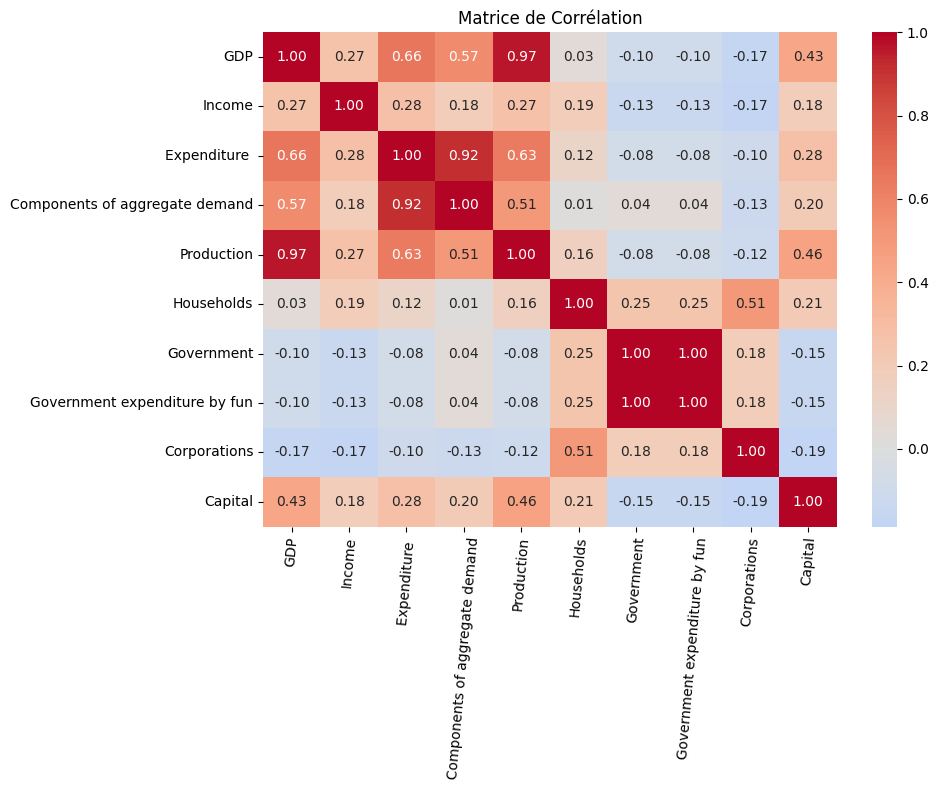

In [5]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  # J'ai l√©g√®rement agrandi la figure pour une meilleure lisibilit√©
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corr√©lation")
plt.xticks(rotation=85)  # Rotation des labels pour une meilleure lisibilit√©
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

-> Ce graphique repr√©sente une matrice de corr√©lation, un outil statistique qui mesure la relation lin√©aire entre deux variables. Chaque valeur de corr√©lation est comprise entre -1 et 1.
Exemples sp√©cifiques dans la matrice :

* GDP et Production : Corr√©lation tr√®s √©lev√©e (0.97), ce qui signifie que ces deux variables √©voluent presque toujours ensemble.
* Expenditure et Components of aggregate demand : Corr√©lation forte (0.92), montrant une relation directe entre ces deux variables.
* GDP et Government : Corr√©lation faible ou n√©gative (-0.10), ce qui sugg√®re une relation inverse faible ou inexistante entre ces variables.
* Corporations et Capital : Corr√©lation n√©gative mod√©r√©e (-0.19), ce qui indique une faible relation inverse entre ces variables.


##### 5. Extraction des Valeurs Propres

* Les valeurs propres repr√©sentent la proportion de variance expliqu√©e par chaque composante principale (CP).
* Les vecteurs propres repr√©sentent les coefficients (ou poids) associ√©s √† chaque variable pour former les composantes principales.

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [ 3.55  2.23  1.34  1.    0.88  0.61  0.31  0.06  0.02 -0.  ]
Vecteurs propres :
 [[ 0.48  0.06 -0.04  0.05  0.24  0.45  0.01  0.18 -0.69  0.  ]
 [ 0.22 -0.03  0.22  0.38 -0.8   0.18  0.29  0.02  0.02  0.  ]
 [ 0.46  0.11 -0.1  -0.35 -0.17 -0.26 -0.05 -0.73 -0.11  0.  ]
 [ 0.4   0.15 -0.25 -0.38 -0.18 -0.37  0.08  0.64  0.15 -0.  ]
 [ 0.47  0.09  0.05  0.08  0.25  0.45 -0.13 -0.06  0.69 -0.  ]
 [ 0.05  0.38  0.62  0.04 -0.08 -0.18 -0.63  0.12 -0.09 -0.  ]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.    0.71]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.   -0.71]
 [-0.14  0.3   0.52 -0.48  0.11  0.18  0.58 -0.01  0.03 -0.  ]
 [ 0.29 -0.02  0.24  0.51  0.4  -0.54  0.38 -0.02  0.    0.  ]]


* Valeurs Porpres:
   * Interpr√©tation :
      * La somme des valeurs propres est √©gale au nombre de variables (ici, 10).
      * Chaque valeur propre indique la quantit√© de variance expliqu√©e par une composante principale.
      * Les premi√®res composantes principales (celles avec les plus grandes valeurs propres) capturent la majorit√© de la variance.
* Vecteurs propres
   * Premi√®re composante principale (CP1) :
      * Poids associ√©s : [0.48, 0.22, 0.46, 0.40, 0.47, 0.05, -0.13, -0.13, -0.14, 0.29].
         * Les coefficients les plus √©lev√©s en valeur absolue sont pour :
         GDP (0.48), Expenditure (0.46), Production (0.40), et Capital (0.47).
         * Interpr√©tation : 
         La premi√®re composante principale est fortement influenc√©e par des variables √©conomiques globales telles que GDP, 
         Expenditure, Production et Capital.
   * Deuxi√®me composante principale (CP2) :
      * Poids associ√©s : [0.06, -0.03, 0.11, 0.15, 0.09, 0.38, 0.60, 0.60, 0.30, -0.02].
         * Les coefficients les plus √©lev√©s en valeur absolue sont pour :
           Households (0.38), Government expenditure by function (0.60) et Government (0.60).
         * Interpr√©tation : La deuxi√®me composante principale est domin√©e par les variables li√©es aux d√©penses publiques et 
          aux m√©nages.

##### 5. Illustration des Composantes Principales

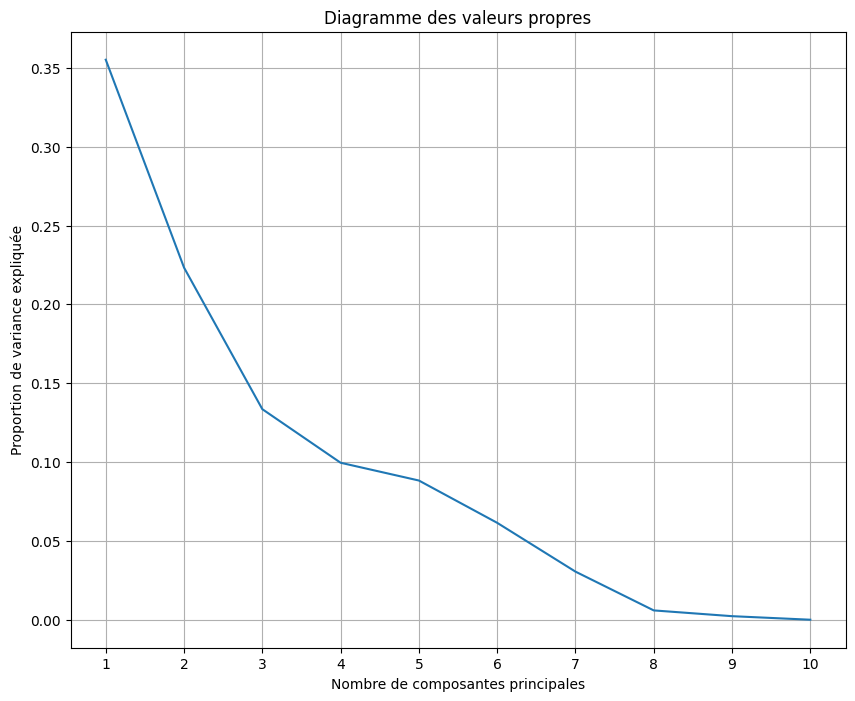

In [7]:
pca = PCA(n_components=len(data.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliqu√©e')
plt.title('Diagramme des valeurs propres')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

* Proportion de variance expliqu√©e :

   * L'axe des ordonn√©es (y) repr√©sente la proportion de variance expliqu√©e par chaque composante principale.
   * L'axe des abscisses (x) correspond au num√©ro de chaque composante principale.
   * La premi√®re composante principale (CP1) explique environ 35 % de la variance totale, la deuxi√®me composante principale 
     (CP2) en explique 22 %, et ainsi de suite. La proportion diminue progressivement.

* Interpr√©tation :
   * Le coud√© (ou "elbow") du graphe, souvent visible comme un point d'inflexion, indique le nombre optimal de composantes 
     principales √† retenir pour expliquer la majorit√© de la variance.
   * Dans ce cas, le coud√© semble se situer autour de 3 ou 4 composantes principales.
     Cela signifie que les trois ou quatre premi√®res composantes principales suffisent pour capturer l'essentiel de 
     l'information dans les donn√©es, avec une perte minimale de variance.

##### 6. Application de l'ACP

 1. On r√©duit les donn√©es √† deux dimensions principales pour simplifier l'analyse

In [8]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

2. Affichage des nouvelles donn√©es projet√©es sur les composantes principales.

In [9]:
print("Nouvelles donn√©es apr√®s ACP :")
print(X_pca)

Nouvelles donn√©es apr√®s ACP :
[[ 0.50982098 -0.36576929]
 [ 0.45012051  2.13869932]
 [-0.48589277  1.86147868]
 [ 0.46489928  0.47038334]
 [-1.24320125 -2.86223311]
 [ 0.29032314 -0.99417422]
 [ 3.19356006  1.09848103]
 [ 0.12765366 -0.6179487 ]
 [-1.55352125 -0.50338735]
 [-2.5219304  -0.24956917]
 [-1.94498734 -1.15340535]
 [-1.75011321 -0.25062765]
 [-1.82978417  0.54932118]
 [-2.27235429  1.21334875]
 [-2.48425106  2.89427292]
 [-1.34855796  1.38604186]
 [ 1.83382849  1.73237187]
 [ 0.28730662  0.82597903]
 [ 3.03785637  1.01596362]
 [ 2.4784406  -0.91168541]
 [ 1.74176256 -2.92927603]
 [ 4.5865618  -2.71552997]
 [ 2.98678698 -0.33096225]
 [ 0.04259219  2.08265855]
 [-2.35434928  0.2693077 ]
 [-1.01223594 -0.65596679]
 [-1.14497519 -0.36579242]
 [-1.46007709 -1.49992517]
 [-2.92462213  2.21869202]
 [ 0.60006767 -3.01741559]
 [ 0.90843117  0.86355092]
 [-1.03539351  0.08093819]
 [ 1.5517389  -0.72938509]
 [ 1.17407379 -0.13146785]
 [ 1.91160696  0.70366215]
 [-1.39071569 -0.508098

* Interpr√©tation :
   * Chaque ligne du tableau repr√©sente une observation dans les donn√©es transform√©es.
   * Les colonnes correspondent aux deux premi√®res composantes principales :
      * CP1 (premi√®re colonne) : explique la plus grande proportion de la variance.
      * CP2 (deuxi√®me colonne) : explique la deuxi√®me plus grande proportion de la variance.

3.Visualisation des donn√©es dans l'espace des deux premi√®res composantes principales.

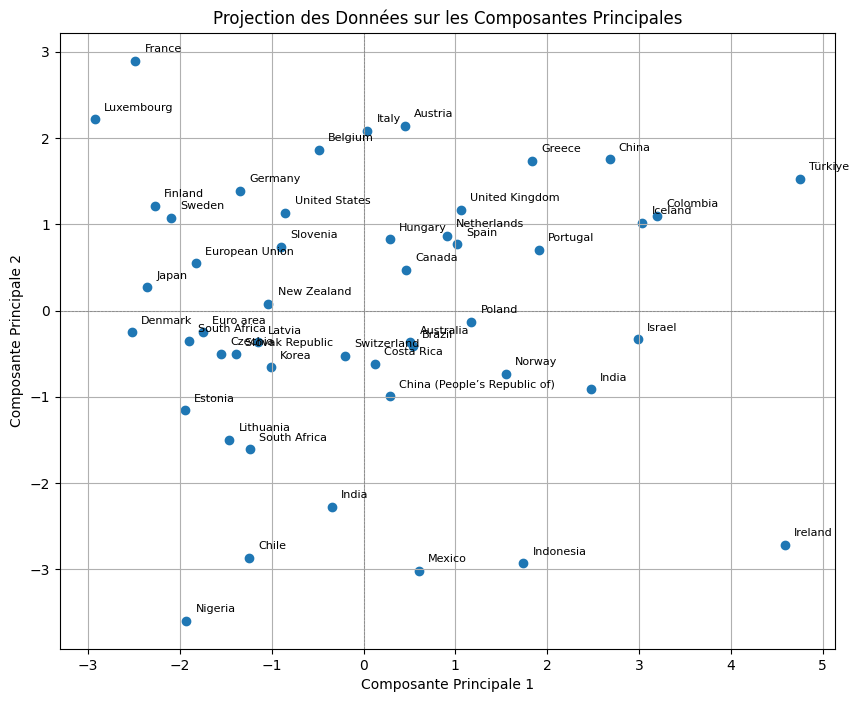

In [10]:
plt.figure(figsize=(10, 8))

# Convertir les noms des pays en une liste
countries = df['Reference area'].tolist()

# Cr√©er le nuage de points
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Points')

# Ajouter les √©tiquettes pour chaque point
for i, country in enumerate(countries):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, country, fontsize=8)

# Ajouter les √©l√©ments du graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Donn√©es sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


Le graphique montre la projection des pays sur les deux premi√®res composantes principales (CP1 et CP2).
* R√©partition g√©n√©rale :
  * Composante principale 1 (CP1) (axe horizontal) :
    Elle semble repr√©senter une dimension li√©e √† des diff√©rences structurelles majeures entre les pays. Les pays tr√®s √† 
    droite (par exemple, Ireland) sont tr√®s distincts de ceux √† gauche (comme Nigeria ou Chile).
  * Composante principale 2 (CP2) (axe vertical) :
    Elle capte une autre dimension, potentiellement li√©e √† des caract√©ristiques secondaires (√©conomiques, sociales ou 
    culturelles). Les pays en haut (par exemple, France, Luxembourg) se diff√©rencient fortement de ceux en bas (Mexico, 
    India).

* Pays similaires :
  France et Luxembourg se situent dans une zone proche sur le plan CP1-CP2, sugg√©rant des caract√©ristiques similaires.
  South Africa, Lithuania, et Estonia forment un groupe dans la partie inf√©rieure gauche.
* Pays distincts :
  Ireland (√† l'extr√™me droite) est isol√© sur CP1, sugg√©rant qu'il se distingue nettement des autres pays.
  Nigeria (en bas √† gauche) est √©galement tr√®s √©loign√© des autres, indiquant des diff√©rences significatives.
* Pays proches du centre :
  Les pays comme Denmark, Euro area, et New Zealand sont proches du centre. Cela indique qu'ils sont relativement "neutres" 
  dans cet espace, sans caract√©ristiques extr√™mes dans les deux premi√®res composantes.


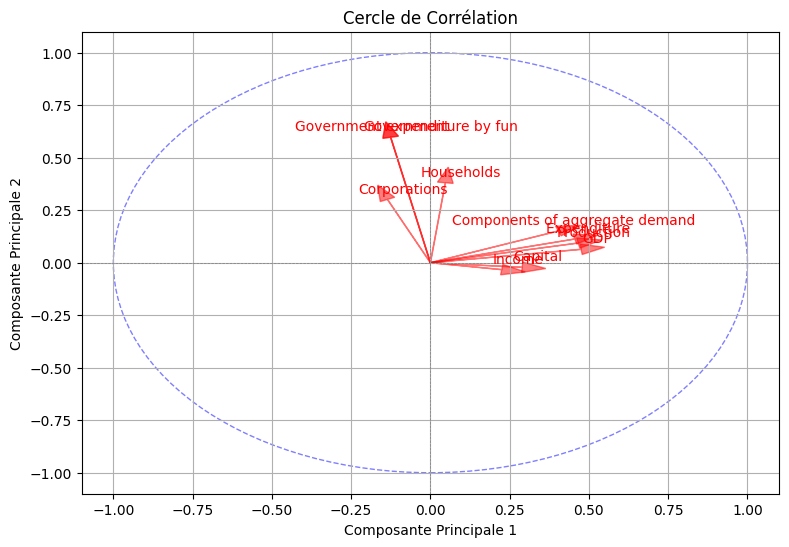

In [11]:
offset = 0.05
plt.figure(figsize=(9,6))
components = pca.components_
variable_names = data.columns.tolist()
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x + offset, y + offset, variable_names[i], color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corr√©lation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Le cercle de corr√©lation montre comment les variables initiales sont projet√©es dans l'espace des deux premi√®res composantes principales (CP1 et CP2)

* Position des variables :
  * Variables bien repr√©sent√©es (longues fl√®ches) :

     Les variables avec des fl√®ches proches du cercle (par exemple, Var8, Var9) contribuent fortement aux composantes principales CP1 et CP2.
     Ces variables ont une forte corr√©lation lin√©aire avec au moins l'une des deux composantes.
  * Variables faiblement repr√©sent√©es (courtes fl√®ches) :

     Les fl√®ches qui ne s'√©tendent pas loin du centre (par exemple, Var10) indiquent des variables moins bien expliqu√©es par CP1 et CP2. Cela signifie qu'elles pourraient √™tre plus corr√©l√©es avec des composantes principales ult√©rieures (CP3, CP4).

* Corr√©lation avec CP1 (axe horizontal) :
   Les fl√®ches orient√©es vers la droite ou la gauche (par exemple, Var6, Var8) ont une forte corr√©lation (positive ou n√©gative) avec CP1.
* Corr√©lation avec CP2 (axe vertical) :
  Les fl√®ches orient√©es vers le haut ou le bas (par exemple, Var9) sont corr√©l√©es avec CP2.
* Variables interm√©diaires :
Les fl√®ches obliques (par exemple, Var8) ont une corr√©lation partag√©e entre CP1 et CP2.

# Classification Automatique

Comment regrouper les observations sur la base des deux premi√®res composantes principales pour r√©v√©ler des structures ou des similarit√©s au sein des donn√©es initiales multivari√©es ?

### 1.Importation des biblioth√®ques n√©cessaires

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import MinMaxScaler

## K-means Clustring

In [13]:
# --- a. K-means clustering ---
# D√©terminer le meilleur nombre de clusters avec la m√©thode "elbow"
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

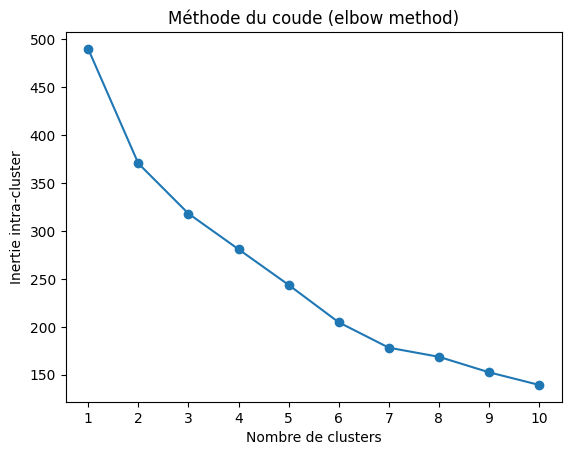

In [14]:
# Visualiser le crit√®re d'inertie
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie intra-cluster")
plt.title("M√©thode du coude (elbow method)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()


##### Interpr√©tation :
 * Axe des X : Repr√©sente le nombre de clusters ùëò.
 * Axe des Y : Repr√©sente l'inertie intra-cluster, c'est-√†-dire la somme des distances au carr√© entre chaque point et le             centre de son cluster. Une valeur plus faible indique des clusters plus compacts.

 * Tendance g√©n√©rale :
   L'inertie diminue √† mesure que ùëò augmente, car plus de clusters permettent une meilleure approximation des donn√©es. Cependant, apr√®s un certain point, l'am√©lioration devient n√©gligeable.

 * Point d'inflexion (le "coude") :
   * Le coude correspond au point o√π la r√©duction de l'inertie commence √† ralentir consid√©rablement.
   * C'est un compromis entre avoir un bon nombre de clusters et √©viter un sur-ajustement (trop de clusters).
##### R√©sultat pour ce graphe :
   En observant le graphe, le coude semble se situer autour de ùëò=3 ou ùëò=4. Cela signifie que 3 ou 4 clusters pourraient √™tre un choix raisonnable pour partitionner les donn√©es.

In [15]:
# Choisir k (par exemple, k=3) et appliquer K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

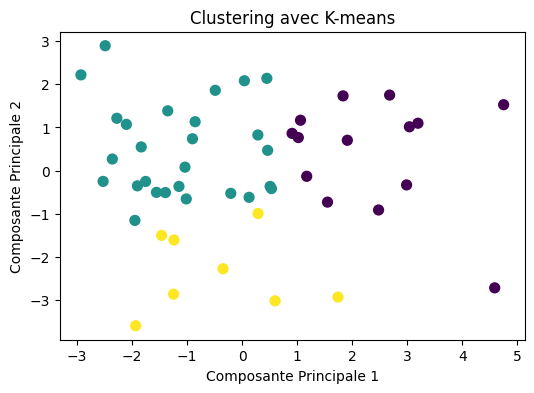

In [16]:
# --- c. Visualisation des r√©sultats (par exemple, avec CP1 et CP2) ---
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Clustering avec K-means")
plt.show()

##### Interpr√©tation :
* Axe X et Axe Y :
  Ils correspondent aux deux premi√®res composantes principales obtenues avec l'ACP. Ces axes synth√©tisent l'essentiel de la variance des donn√©es initiales.
* Couleurs des points :
  Chaque couleur repr√©sente un cluster identifi√© par K-means.
  Dans ce cas, il y a trois clusters (violet, vert, jaune).
* Position des points :
  Les points proches dans l'espace des composantes principales appartiennent √† des clusters similaires.
  Les fronti√®res entre les clusters montrent les diff√©rences d√©tect√©es par l'algorithme.

In [17]:
from sklearn.metrics import silhouette_score
# √âvaluer la qualit√© des clusters avec l'indice de silhouette
score = silhouette_score(X_pca, df['Cluster'])
print(f"Indice de silhouette pour K-means : {score:.2f}")

Indice de silhouette pour K-means : 0.34


##### Analyse de la qualit√© du clustering :
  Les clusters semblent bien s√©par√©s, en particulier les clusters violet et jaune.
  Le cluster vert a une dispersion plus √©lev√©e, ce qui peut indiquer une certaine variabilit√© dans ce groupe.

In [18]:
# Cr√©er une liste pour stocker les sous-tables par cluster
clusters = []

# Parcourir les clusters uniques
for cluster in sorted( df['Cluster'].unique()):
    # Filtrer les lignes correspondant au cluster courant
    cluster_table = df[df['Cluster'] == cluster]
    clusters.append(cluster_table)
    print(f"Cluster {cluster}:")
    print(cluster_table)
    print("\n")
   

Cluster 0:
    Unnamed: 0  Reference area       GDP  TIME_PERIOD     Income  \
6            6        Colombia  7.288884         2022   0.105946   
16          16          Greece  5.743649         2022   7.695864   
18          18         Iceland  8.992508         2022   0.578997   
19          19           India  6.987039         2022   2.093221   
21          21         Ireland  8.619503         2022   5.121668   
22          22          Israel  6.640633         2022   3.325195   
30          30     Netherlands  5.007235         2022   1.092674   
32          32          Norway  3.005635         2022  30.729931   
33          33          Poland  5.255459         2022   4.659426   
34          34        Portugal  6.985842         2022   4.091959   
38          38           Spain  6.179312         2022   3.793980   
41          41         T√ºrkiye  5.533469         2022   4.612668   
42          42  United Kingdom  4.839085         2022   3.922587   
46          46           China  6.00

## K-medoids clustering

In [19]:
k_values = range(2, 12)  # Tester k de 2 √† 10
def calculate_inertia(data, k_range):
    inertia_scores = []
    for k in k_range:
        # Initialisation al√©atoire des indices des m√©do√Ødes
        initial_medoids = np.random.choice(len(data), k, replace=False)
        kmedoids_instance = kmedoids(data, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
        kmedoids_instance.process()
        
        # Calculer la somme des distances intra-cluster
        clusters = kmedoids_instance.get_clusters()
        medoids = kmedoids_instance.get_medoids()
        inertia = 0
        for cluster_id, cluster_points in enumerate(clusters):
            for point_idx in cluster_points:
                # Ajouter la distance entre chaque point et son m√©do√Øde
                inertia += np.linalg.norm(data[point_idx] - data[medoids[cluster_id]])
        inertia_scores.append(inertia)
    return inertia_scores

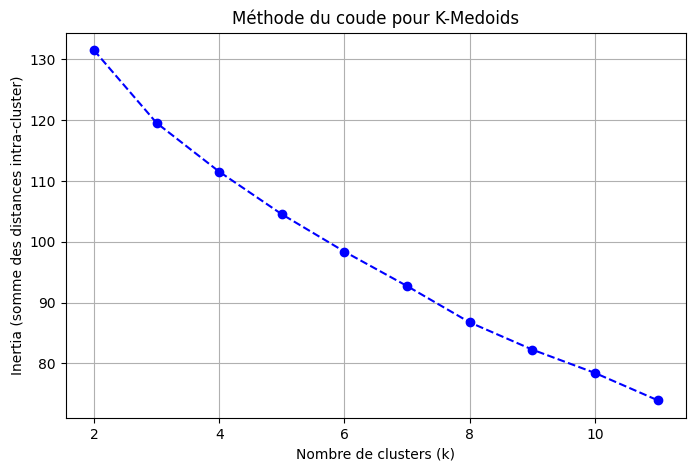

In [20]:
inertia_scores = calculate_inertia(X_scaled, k_values)

# Visualisation des scores d'inertia (m√©thode du coude)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o', linestyle='--', color='blue')
plt.title("M√©thode du coude pour K-Medoids")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (somme des distances intra-cluster)")
plt.grid()
plt.show()

##### Interpr√©tation :
 * Axe X :
   Repr√©sente le nombre de clusters ùëò.
 * Axe Y :
  Correspond √† l'inertie (somme des distances intra-cluster), qui mesure la compacit√© des clusters.
  Une inertie plus faible indique des clusters plus compacts.
 * Courbe d√©croissante :
   Lorsque ùëò augmente, l'inertie diminue car les points sont r√©partis sur plus de clusters, ce qui r√©duit les distances intra-cluster.
 * M√©thode du coude :
   On cherche un point o√π la diminution de l'inertie ralentit significativement, formant un "coude" dans la courbe.
   Ce point repr√©sente un compromis optimal entre la compacit√© des clusters et leur nombre.
##### Analyse :
Sur ce graphique, le coude semble se situer autour de ùëò=4 ou ùëò=5.
Cela sugg√®re que 4 ou 5 clusters pourraient √™tre un choix optimal pour segmenter les donn√©es en utilisant K-medoids.

In [21]:
k = 4
initial_medoids = np.random.choice(len(X_pca), k, replace=False)
kmedoids_instance = kmedoids(X_scaled, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_instance.process()

# R√©cup√©rer les clusters
clusters = kmedoids_instance.get_clusters()
labels = np.zeros(len(X_pca))
for cluster_id, cluster_points in enumerate(clusters):
    labels[cluster_points] = cluster_id


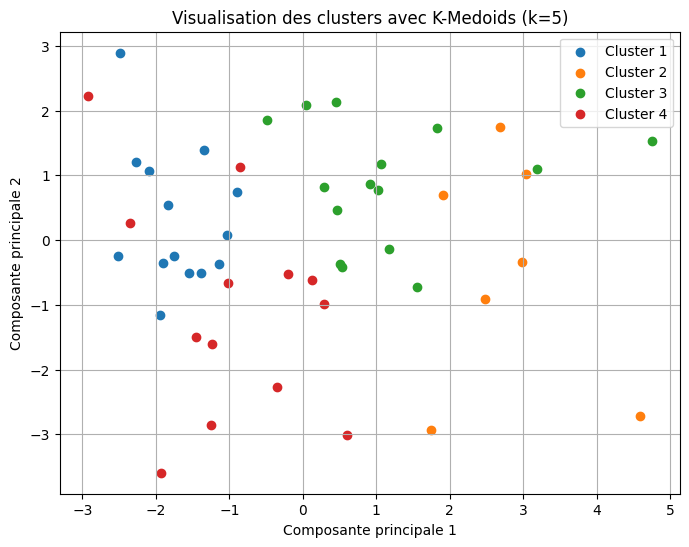

In [22]:


# Visualisation des clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(X_pca[labels == cluster_id, 0], X_pca[labels == cluster_id, 1], label=f'Cluster {cluster_id + 1}')
    
plt.title("Visualisation des clusters avec K-Medoids (k=5)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()

Chaque couleur repr√©sente un cluster distinct parmi les 5 identifi√©s par K-Medoids (Cluster 1 √† Cluster 4).
Les points de m√™me couleur appartiennent au m√™me cluster.
Position des points :

Les points dans un cluster sont plus proches de leur m√©do√Øde (centre du cluster).
Les clusters semblent bien s√©par√©s dans certaines zones, bien que des chevauchements soient visibles (notamment entre Cluster 1 et Cluster 2).
R√©partition des clusters :

Le Cluster 4 (rouge) regroupe des individus dispers√©s dans la partie droite du graphique.
Le Cluster 3 (vert) occupe une zone centrale relativement dense.
Les Clusters 1 (bleu) et 2 (orange) se situent principalement sur la gauche avec quelques chevauchements.


## DBSCAN clustering

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

**D√©termination du param√®tre epsilon**

Nous utilisons la m√©thode du graphe des k-distances pour choisir une valeur appropri√©e pour epsilon :

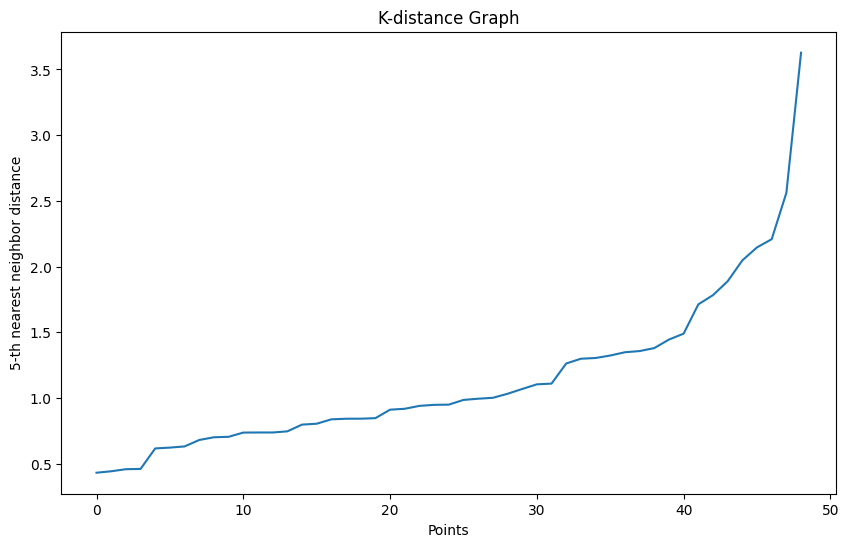

In [24]:
# Function to plot k-distance graph
def plot_k_distance_graph(X_scaled, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_pca)
    distances, _ = neigh.kneighbors(X_pca)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10,6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_pca, k=5)

**Description du Graphique :** 
* Axe X (Points) :
   Correspond aux points de donn√©es tri√©s en fonction de leur distance au 5·µâ voisin le plus proche (car ùëò=5).
* Axe Y (5·µâ nearest neighbor distance) :
  Montre la distance au 5·µâ plus proche voisin pour chaque point, tri√©e dans l'ordre croissant.
* La Forme du Graphique :
  Une partie relativement plate (faibles valeurs de distance) indique que les points sont proches les uns des autres dans des r√©gions dens√©ment peupl√©es.
  Une "coud√©e" (augmentation abrupte) appara√Æt lorsque la distance augmente consid√©rablement. Cela signale la transition entre des points denses (dans des clusters) et des points √©loign√©s (potentiellement bruit ou en bordure).

**Interpr√©tation des R√©sultats :**

* Coud√©e dans le Graphique :
La transition abrupte visible vers la fin du graphique (aux environs de ùë¶‚âà2.5) correspond √† la coud√©e ou "knee".
Ce point indique le seuil id√©al (ùúÄ) pour la distance maximale entre points pour former un cluster.
Valeur de ùúÄ:
√Ä partir de ce graphique, une valeur de ùúÄ d‚Äôenviron 2.5 √† 3.0 semble appropri√©e pour DBSCAN.
* Points au-del√† de la Coud√©e :
  Les points situ√©s apr√®s la coud√©e (ayant des distances plus √©lev√©es) sont probablement des points de bruit ou isol√©s, car ils ne font pas partie d'une r√©gion dense.

**R√©alisation du clustering DBSCAN**

In [32]:
# Perform DBSCAN clustering
epsilon = 2.5 # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_pca)

**Visualisation des r√©sultats**

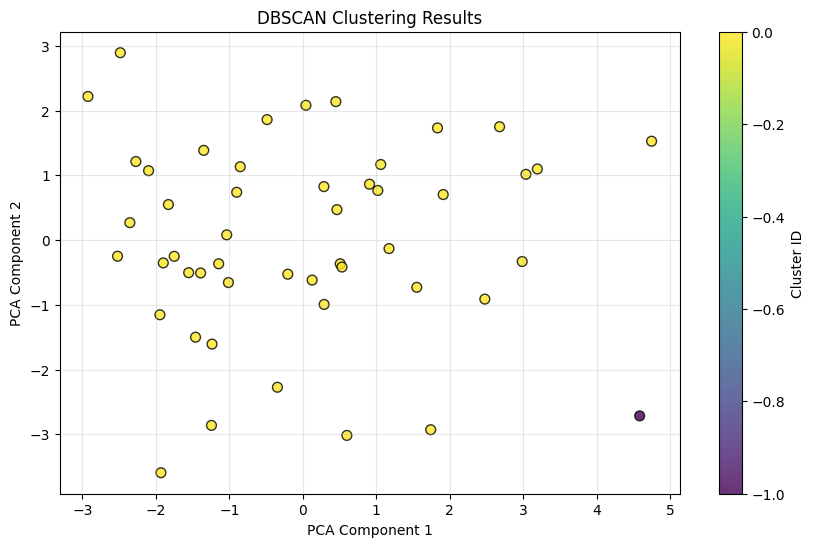

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des r√©sultats de DBSCAN
plt.figure(figsize=(10, 6))

# Scatter plot avec les clusters
scatter = plt.scatter(
    X_pca[:, 0],  # Premi√®re composante PCA
    X_pca[:, 1],  # Deuxi√®me composante PCA
    c=clusters,  # Les √©tiquettes des clusters g√©n√©r√©es par DBSCAN
    cmap='viridis',  # Palette de couleurs
    s=50,  # Taille des points
    edgecolor='k',  # Bordure noire pour am√©liorer la visibilit√©
    alpha=0.8  # Transparence pour mieux voir les superpositions
)

# Ajout d'une barre de couleur
plt.colorbar(scatter, label="Cluster ID")

# Labels et titre
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Grille pour am√©liorer la lecture
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()


* Axes (PCA Component 1 et PCA Component 2) :

  Les deux premi√®res composantes principales sont utilis√©es pour projeter les donn√©es dans un espace bidimensionnel.

* Points color√©s par cluster :

  Les points en jaune appartiennent au cluster principal identifi√© par DBSCAN.
  Les points en violet (valeur n√©gative dans la barre de couleur) sont class√©s comme bruit (points isol√©s ou hors des zones denses).

**Interpr√©tation :**

DBSCAN a identifi√© un cluster significatif dans les donn√©es, correspondant aux points en jaune.
Les points en violet n'ont pas satisfait les crit√®res de densit√© (distance ùúÄ min_sample) et sont donc consid√©r√©s comme du bruit.

Noise points: 1
Cluster 0: 48 points


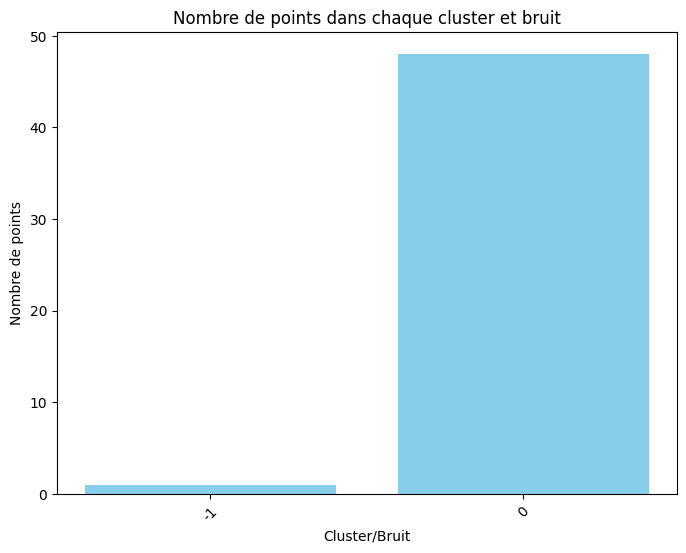

In [34]:
# Compter le nombre de points dans chaque cluster et bruit
unique, counts = np.unique(clusters, return_counts=True)

# Print number of clusters and noise points
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f'Noise points: {count}')
    else:
        print(f'Cluster {cluster}: {count} points')


# Tracer les r√©sultats
plt.figure(figsize=(8, 6))
plt.bar(unique.astype(str), counts, color='skyblue')
plt.title('Nombre de points dans chaque cluster et bruit')
plt.xlabel('Cluster/Bruit')
plt.ylabel('Nombre de points')
plt.xticks(rotation=45)
plt.show()

* Axes :

  Axe X : Repr√©sente les cat√©gories ‚Äî un cluster (>) et le bruit (ùëÇ).
  Axe Y : Repr√©sente le nombre de points dans chaque cat√©gorie.

* Barres :

  La barre du bruit (ùëÇ) est plus grande, indiquant qu'une majorit√© de points n'ont pas √©t√© assign√©s √† un cluster (classification comme bruit).
  La barre du cluster principal (>) est plus petite, avec moins de points assign√©s.

* Interpr√©tation :

  DBSCAN a √©t√© strict dans sa classification, d√©tectant un seul cluster dense mais rejetant beaucoup de points comme bruit.
  Cela peut indiquer que les param√®tres ùúÄ ou min_samples sont trop restrictifs.

* Analyse Globale:

  Points d√©tect√©s comme bruit (bruit √©lev√©) :
 
    Une proportion importante de points est consid√©r√©e comme bruit. Cela peut refl√©ter que les donn√©es sont dispers√©es ou que les crit√®res de densit√© sont trop stricts.

  Cluster principal :
     Le cluster identifi√© est compact et satisfait les conditions de densit√©. Il peut repr√©senter un groupe homog√®ne de donn√©es dans l'espace PCA.


## Classification ascendante hi√©rarchique :

### Visualisation de la structure hi√©rarchique avec des dendrogrammes :

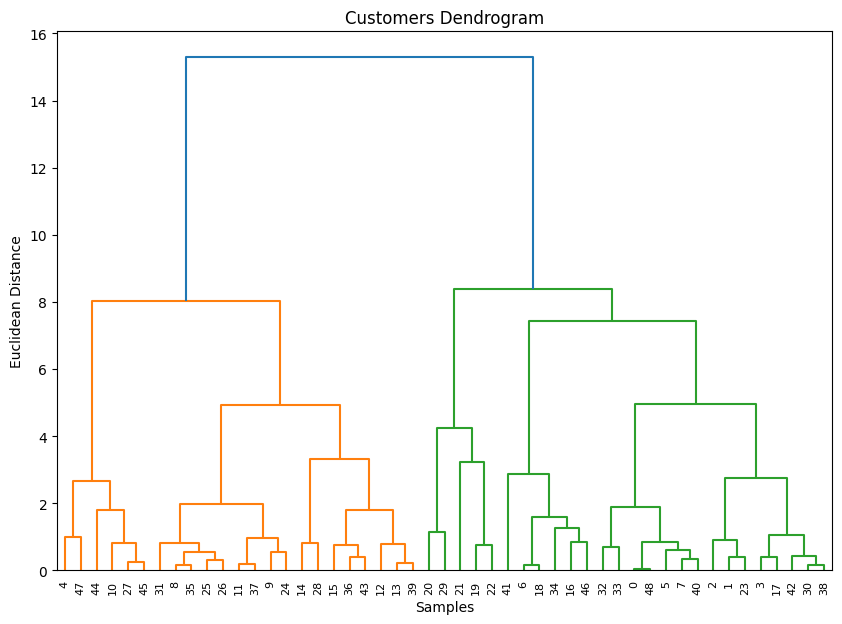

In [28]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Configurer la figure
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# S√©lectionner les donn√©es (ici les donn√©es PCA)
selected_data = X_pca

# G√©n√©rer les clusters hi√©rarchiques
clusters = shc.linkage(selected_data, method='ward', metric="euclidean")

# Tracer le dendrogramme
shc.dendrogram(Z=clusters)

# Ajouter des labels aux axes
plt.xlabel("Samples")  # Exemple : identifier les √©chantillons
plt.ylabel("Euclidean Distance")  # Distance utilis√©e pour regrouper les clusters

# Afficher le graphique
plt.show()


1. Axes du graphique :
Axe X (Samples) : Les indices des √©chantillons (ou points de donn√©es). Chaque √©chantillon est un point individuel au bas de l‚Äôarbre.
Axe Y (Euclidean Distance) : La distance ou dissimilarit√© entre les groupes ou √©chantillons.
2. Regroupement des points :
L‚Äôarbre montre comment les √©chantillons (points de donn√©es) sont regroup√©s par √©tapes successives.
Les √©chantillons proches sont regroup√©s en fonction de la distance euclidienne.
Plus la distance (axe Y) entre deux groupes est petite, plus leurs points sont similaires.

### Determination de clusters :

Text(0, 0.5, 'Euclidean Distance')

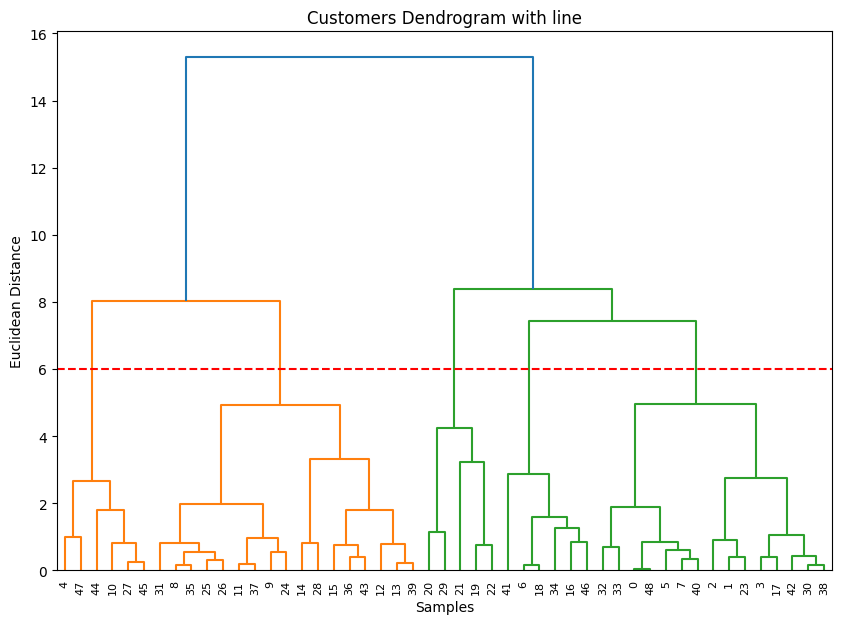

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 6, color = 'r', linestyle = '--')
plt.xlabel("Samples")  # Exemple : identifier les √©chantillons
plt.ylabel("Euclidean Distance")  # Distance utilis√©e pour regrouper les clusters


* Ligne rouge (seuil de coupe) :
  La ligne rouge horizontale indique le seuil fix√© pour diviser les groupes.
  **Dans cet exemple :**
  La ligne rouge est √† une distance d‚Äôenviron 5.
  Tous les regroupements coupant cette ligne d√©finissent des clusters (groupes ind√©pendants).
* Clusters identifi√©s :
  Les deux couleurs principales (orange et vert) indiquent deux clusters principaux au seuil donn√©.
  Cluster 1 (orange) : Inclut des √©chantillons situ√©s √† gauche de l‚Äôarbre.
  Cluster 2 (vert) : Inclut les √©chantillons situ√©s √† droite.
* Interpr√©tation g√©n√©rale :
  Les donn√©es pr√©sentent deux groupes principaux avec une certaine similarit√© interne.
  Si on abaissait la ligne rouge (seuil), davantage de petits clusters appara√Ætraient. Inversement, en √©levant la ligne rouge, on obtiendrait moins de clusters.


### Impl√©mentation d'un clustering hi√©rarchique agglom√©ratif :

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
print(clustering_model.labels_)


[0 0 0 0 3 0 4 0 1 1 3 1 1 1 1 1 4 0 4 2 2 2 2 0 1 1 1 3 1 2 0 1 0 0 4 1 1
 1 0 1 0 4 0 1 3 3 4 3 0]


La ligne imprim√©e repr√©sente les √©tiquettes de clusters attribu√©es √† chaque point dans le jeu de donn√©es selected_data.
Chaque valeur correspond √† l'√©tiquette d'un cluster (entre 0 et 4, car vous avez demand√© 5 clusters).

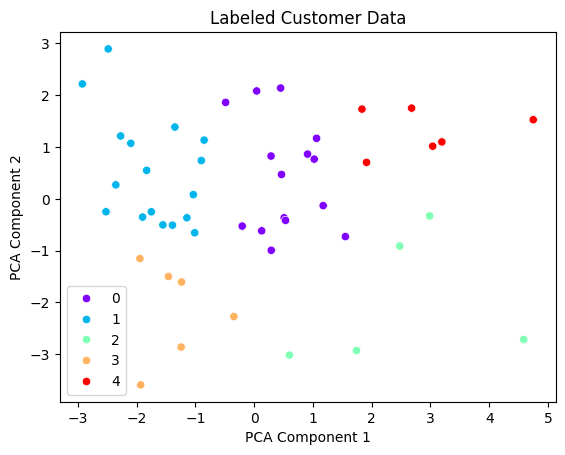

In [31]:
sns.scatterplot(
    x=X_pca[:, 0],  # Correctly specify the x-axis values
    y=X_pca[:, 1],  # Correctly specify the y-axis values
    hue=clustering_model.labels_,  # Use the cluster labels for color coding
    palette="rainbow"  # Choose the color palette for the clusters
).set_title('Labeled Customer Data')

plt.xlabel('PCA Component 1')  # Label for x-axis
plt.ylabel('PCA Component 2')  # Label for y-axis
plt.show()

* On observe une certaine s√©paration entre les clusters, notamment :

   Le cluster 4 (rouge) semble assez distinct, situ√© principalement dans la partie droite du graphique.
   Le cluster 0 (violet) est plus central, mais montre une certaine concentration.
   Les clusters 1 (cyan), 2 (vert clair) et 3 (beige) semblent plus proches les uns des autres, avec un certain chevauchement, ce qui sugg√®re qu'ils pourraient √™tre moins distincts en termes des deux premi√®res composantes principales.